In [ ]:
using Pkg
Pkg.add("FFTW")
Pkg.add("Plots")
Pkg.add("LinearAlgebra")
Pkg.add("Test")

In [1]:
using FFTW
using Plots
using LinearAlgebra
using Test

# DFT Implementation

$$
X(k)=DFT[x(n)]_N=\sum_{n=0}^{N-1}x(n)e^{-j\frac{2\pi}{N}kn} \text{, }k\in[0, N-1]
$$

In [2]:
# TODO: Implement 2022-04-25 07:57:19%z
function DFT_Implemtation(x)
    N = length(x)

    x_in_k = convert(Array{ComplexF64},zeros(N))
    for k in 1:N # k is in(0, n-1) mathmatically, However, Julia index start from 0
        for n in 1:N
            x_in_k[k] += x[n]*exp(-(2*pi/N)*(k-1)*(n-1)im)
        end
    end

    x_in_k
end

test_fun(x) = cos(x)
x = test_fun.(LinRange(0,20,50))
@test DFT_Implemtation(x) ≈ fft(x)

Test Passed
  Expression: DFT_Implemtation(x) ≈ fft(x)
   Evaluated: ComplexF64[2.9096177710209594 + 0.0im, 3.166118829367836 + 0.833558497503813im, 4.405604878660025 + 2.4211534602239833im, 17.13509240479053 + 15.246768886656882im, -4.282808694770419 - 5.727341054862322im, -1.3294819291765767 - 2.667450802555731im, -0.5567317984366793 - 1.790007941394055im, -0.21375455461064297 - 1.3570742979878312im, -0.025556493996018365 - 1.0916006952092503im, 0.09061654320202586 - 0.9081985764133719im  …  0.1679593511053539 + 0.7715270029063626im, 0.09061654320203702 + 0.9081985764133385im, -0.025556493995999657 + 1.0916006952092585im, -0.21375455461062787 + 1.3570742979878443im, -0.5567317984366671 + 1.7900079413941061im, -1.329481929176613 + 2.6674508025557695im, -4.282808694770425 + 5.727341054862292im, 17.135092404790456 - 15.246768886656907im, 4.405604878660037 - 2.4211534602240596im, 3.1661188293678344 - 0.8335584975038749im] ≈ ComplexF64[2.90961777102096 + 0.0im, 3.1661188293678366 + 0.8335

# FFT Implementation

In [3]:
function FFT(P)
   
    n=length(P)
    if n ==1
        return P
    end
   
        
    w=MathConstants.e^(-2*pi*im/n)
    P0=Vector{Complex{Float64}}()
    P1=Vector{Complex{Float64}}()
    for i in 1:n
        if i%2==0
            push!(P1,P[i])
        else
            push!(P0,P[i])
        end
    end
    y0=FFT(P0)
    y1=FFT(P1)
    y = zeros(Complex{Float64},n)
    n2 = trunc(Int,n/2)
    for j in 1:n2 
        y[j]=y0[j]+(w^(j-1))*y1[j]
        y[j+ n2]=y0[j]-(w^(j-1))*y1[j]
    end
    return y
   
end

FFT (generic function with 1 method)

In [4]:
p= rand(Float64, 8)
#println(im^2)
println(p)
#println(trunc(Int,10/2))

@test FFT(p) ≈ fft(p)

[0.6612055392793391, 0.5972599716030442, 0.015714857249120362, 0.485038776435577, 0.5695117389872121, 0.06400546795077122, 0.29358156010329994, 0.5651592714638455]


Test Passed
  Expression: FFT(p) ≈ fft(p)
   Evaluated: ComplexF64[3.2514771830722093 + 0.0im, 0.5254154212694275 - 0.04254742743009754im, 0.9214208609141308 + 0.38893260834560717im, -0.34202782068517334 - 0.5982808331384568im, -0.17144979183426656 + 0.0im, -0.3420278206851735 + 0.5982808331384567im, 0.921420860914131 - 0.38893260834560717im, 0.5254154212694274 + 0.04254742743009765im] ≈ ComplexF64[3.2514771830722093 + 0.0im, 0.5254154212694275 - 0.04254742743009756im, 0.9214208609141309 + 0.38893260834560717im, -0.3420278206851735 - 0.5982808331384567im, -0.17144979183426656 + 0.0im, -0.3420278206851735 + 0.5982808331384567im, 0.9214208609141309 - 0.38893260834560717im, 0.5254154212694275 + 0.04254742743009756im]

# Complexity

$$
\begin{aligned}
    \text{DFT: } &O(n^2) \\
    \text{FFT: } &O(n\log n)
\end{aligned}
$$

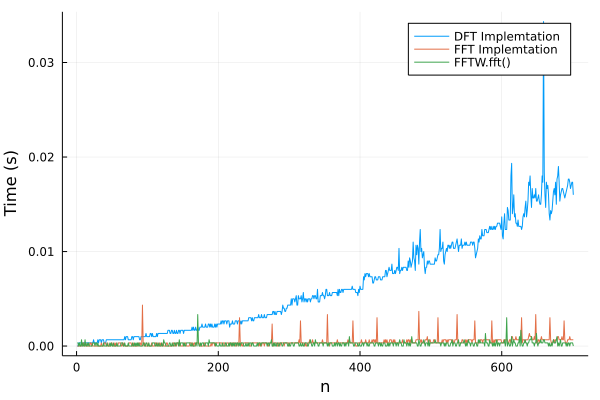

In [5]:
RuningTimes = 3;

DFTTime = []
FFTTime = []
FFTWFFTTime = []

for n in 100:800
    x = test_fun.(LinRange(0,20,n))

    Start = time();
    for i in 1:RuningTimes
        DFT_Implemtation(x)
    end
    push!(DFTTime, time()-Start)

    Start = time();
    for i in 1:RuningTimes
        FFT(x)
    end
    push!(FFTTime, time()-Start)

    Start = time();
    for i in 1:RuningTimes
        fft(x)
    end
    push!(FFTWFFTTime, time()-Start)

end
plot(DFTTime./RuningTimes, label="DFT Implemtation", xlabel="n", ylabel="Time (s)")
plot!(FFTTime./RuningTimes, label="FFT Implemtation")
plot!(FFTWFFTTime./RuningTimes, label="FFTW.fft()")

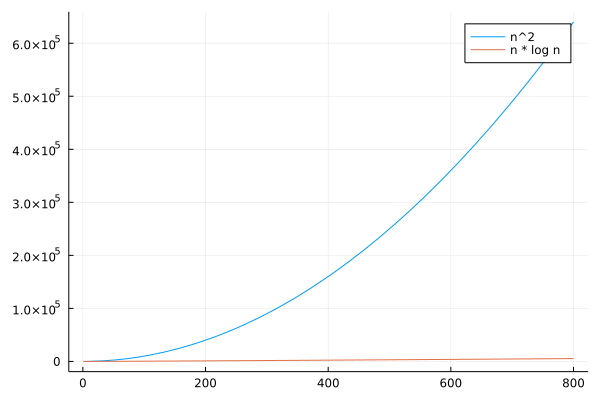

In [6]:
plot([x -> x^2, x-> x * log(x)], xlim=[1 800], label=["n^2" "n * log n"])

# Inverse DFT Implementation

$$
x(n)=IDFT[X(k)]_N=\dfrac{1}{N}\sum_{n=0}^{N-1}X(k)e^{j\frac{2\pi}{N}kn} \text{, }k\in[0, N-1]
$$

In [7]:
# TODO: Implement 2022-04-25 07:57:19%z
function IDFT_Implemtation(X)
    N = length(X)

    x_in_n = convert(Array{ComplexF64},zeros(N))
    for n in 1:N # k is in(0, n-1) mathmatically, However, Julia index start from 0
        for k in 1:N
            x_in_n[n] += X[k]*exp((2*pi/N)*(k-1)*(n-1)im)
        end
    end
    
    x_in_n = x_in_n / N

    x_in_n
end

test_fun(x) = cos(x)
x = test_fun.(LinRange(0,20,50))
@test IDFT_Implemtation(x) ≈ ifft(x)

Test Passed
  Expression: IDFT_Implemtation(x) ≈ ifft(x)
   Evaluated: ComplexF64[0.05819235542041919 + 0.0im, 0.06332237658735672 - 0.01667116995007626im, 0.0881120975732005 - 0.04842306920447967im, 0.34270184809581056 - 0.30493537773313767im, -0.08565617389540839 + 0.11454682109724644im, -0.02658963858353158 + 0.05334901605111451im, -0.011134635968733743 + 0.03580015882788105im, -0.004275091092212901 + 0.02714148595975688im, -0.0005111298799203673 + 0.021832013904185005im, 0.0018123308640403206 + 0.01816397152826734im  …  0.0033591870221064196 - 0.015430540058126545im, 0.0018123308640406943 - 0.0181639715282673im, -0.0005111298799199931 - 0.02183201390418573im, -0.004275091092213254 - 0.027141485959756212im, -0.011134635968733333 - 0.03580015882788113im, -0.02658963858353003 - 0.05334901605111503im, -0.08565617389540875 - 0.11454682109724881im, 0.3427018480958071 + 0.30493537773313933im, 0.0881120975732002 + 0.04842306920447963im, 0.06332237658735576 + 0.016671169950077804im] ≈ Compl

# Complexity

$$ O(n^2) $$

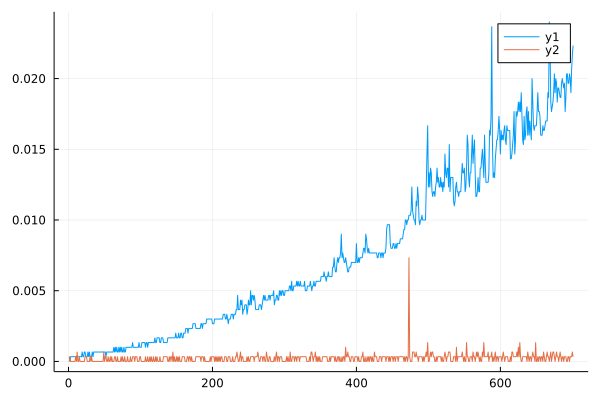

In [8]:
RuningTimes = 3;

IDFTTime = []
IFFTTime = []

for n in 100:800
    x = test_fun.(LinRange(0,20,n))

    Start = time();
    for i in 1:RuningTimes
        IDFT_Implemtation(x)
    end
    push!(IDFTTime, time()-Start)

    Start = time();
    for i in 1:RuningTimes
        ifft(x)
    end
    push!(IFFTTime, time()-Start)

end
plot(IDFTTime./RuningTimes)
plot!(IFFTTime./RuningTimes)